In [1]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
import matplotlib.pyplot as plt

In [7]:
# -----------------------------
# 2. Data Preprocessing
# -----------------------------
data = """The speed of transmission is an important point of difference between the two viruses. 
Influenza has a shorter median incubation period the time from infection to appearance of symptoms 
and a shorter serial interval the time between successive cases than COVID 19 virus. 
The serial interval for COVID 19 virus is estimated to be 5 6 days while for influenza virus  
the serial interval is 3 days. This means that influenza can spread faster than COVID-19."""

sentences = data.lower().split('.')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# create word-index mappings for prediction helper
word_to_index = tokenizer.word_index
index_to_word = {v: k for k, v in word_to_index.items()}

In [8]:
# -----------------------------
# 3. Create Training Data (Context → Target)
# -----------------------------
context_size = 2
contexts, targets = [], []

for seq in sequences:
    for i in range(context_size, len(seq) - context_size):
        target = seq[i]
        context = [seq[i - 2], seq[i - 1], seq[i + 1], seq[i + 2]]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
Y = np.array(targets)

In [9]:
# -----------------------------
# 4. Build Model
# -----------------------------
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=20, input_length=4),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

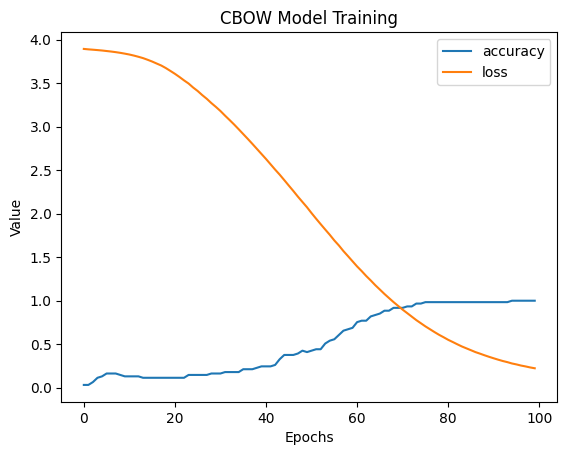

In [10]:
# -----------------------------
# 5. Train Model
# -----------------------------
history = model.fit(X, Y, epochs=100, verbose=0)

# -----------------------------
# 6. Plot Accuracy & Loss
# -----------------------------
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title("CBOW Model Training")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()

In [13]:
# -----------------------------
# 7. Display Word Embeddings
# -----------------------------
# -----------------------------
# 8. Simple Prediction Helper
# -----------------------------
def guess(word):
    if word in word_to_index:
        x = np.array([[word_to_index[word]] * 4])
        p = model.predict(x, verbose=0)
        print(word, "→", index_to_word[np.argmax(p)])
    else:
        print("word not found")

# Example usage
guess("virus")

embeddings = model.layers[0].get_weights()[0]
print("\nWord Embeddings:\n")
print(embeddings)


virus → covid

Word Embeddings:

[[-1.71663165e-02 -2.34607346e-02 -4.03734297e-03  4.33917902e-02
   1.14536174e-02  2.99207605e-02  1.73160769e-02  2.02804320e-02
  -2.80652288e-02  3.28465141e-02 -2.05684789e-02 -3.55030410e-02
   9.46794823e-03  7.74222612e-03 -8.96453857e-03 -4.28046249e-02
   4.75072004e-02  9.67941433e-03 -4.20974866e-02 -3.57877240e-02]
 [ 2.32326016e-01  1.76238231e-02  3.53044569e-01 -4.97878306e-02
   1.66531250e-01 -2.38328472e-01 -2.54229754e-01  8.32987353e-02
   2.67296284e-01 -1.02677770e-01  3.20759714e-01 -3.96209862e-03
  -3.34477127e-01  1.60219237e-01 -4.41123366e-01  2.33517900e-01
   4.45067585e-02  2.92524546e-01 -2.41063580e-01 -1.70704126e-01]
 [ 1.16570145e-01  2.11822778e-01 -7.86269158e-02  5.86734936e-02
   1.87026076e-02  2.55413502e-01 -2.02161193e-01 -9.11322311e-02
  -4.95608784e-02  8.74591470e-02  1.17720133e-02 -3.50059986e-01
   2.09569871e-01 -2.33406305e-01  1.54528350e-01 -2.77846456e-01
   2.64337212e-01 -1.06154224e-02  3.4711